In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("../datasets/Agrofood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [3]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

numerical_cols, categorical_cols

/var/folders/xx/zwz4dj4j3jzb_g3c5pywl6cdqqzlwj/T/ipykernel_92765/3654986273.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=["object"]).columns


(Index(['Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
        'Rice Cultivation', 'Drained organic soils (CO2)',
        'Pesticides Manufacturing', 'Food Transport', 'Forestland',
        'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
        'On-farm Electricity Use', 'Food Packaging',
        'Agrifood Systems Waste Disposal', 'Food Processing',
        'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
        'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
        'Fires in humid tropical forests', 'On-farm energy use',
        'Rural population', 'Urban population', 'Total Population - Male',
        'Total Population - Female', 'total_emission',
        'Average Temperature °C'],
       dtype='str'),
 Index(['Area'], dtype='str'))

In [ ]:
df.isnull().sum()


Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [ ]:
df[numerical_cols] = df[numerical_cols].fillna(
    df[numerical_cols].median()
)

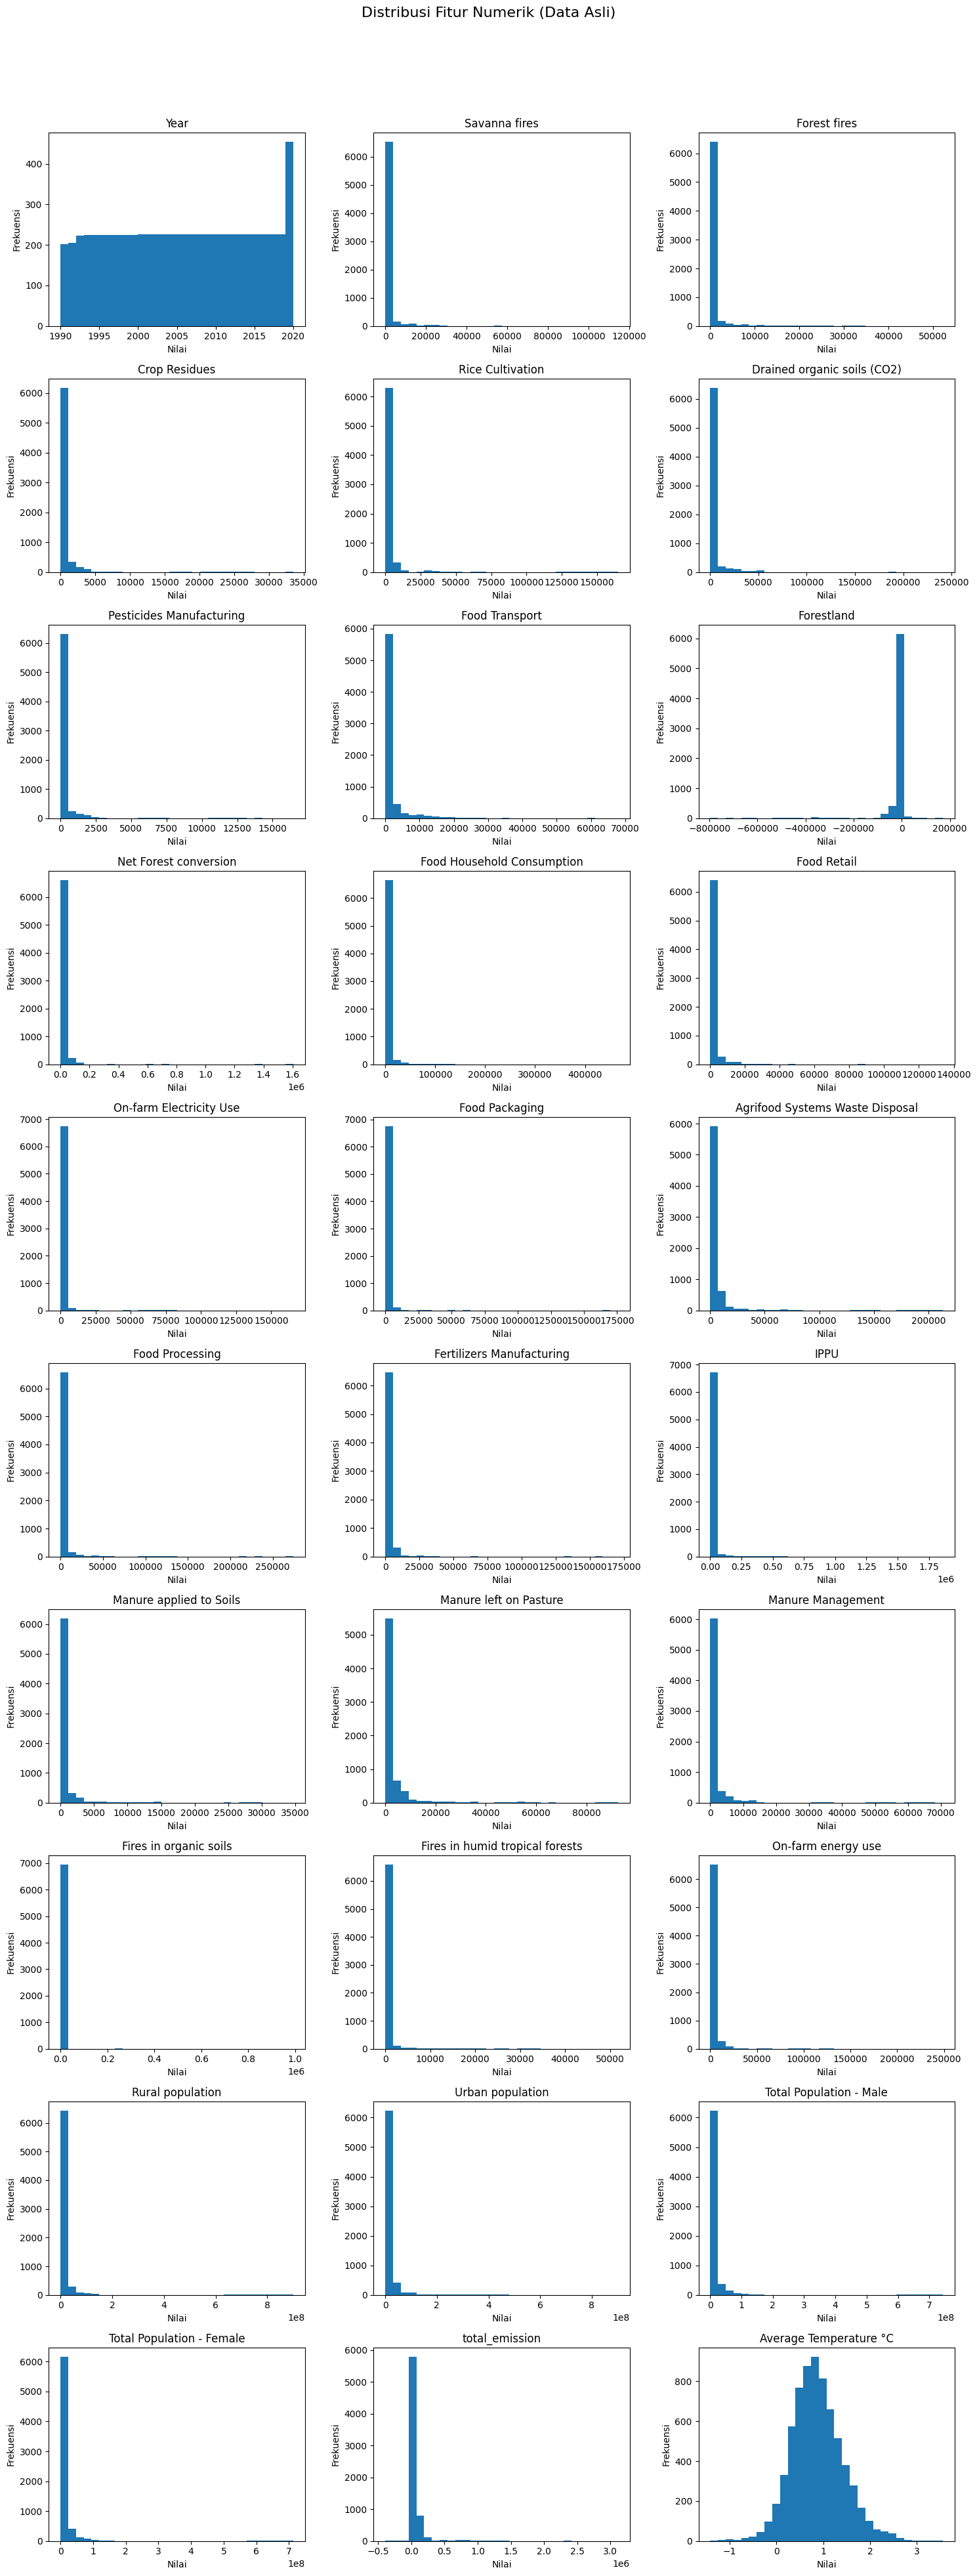

In [22]:
import math

n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df[col], bins=30)
    plt.title(f"{col}")
    plt.xlabel("Nilai")
    plt.ylabel("Frekuensi")

plt.suptitle("Distribusi Fitur Numerik (Data Asli)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
df_outlier = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_outlier[col] = np.clip(df[col], lower, upper)

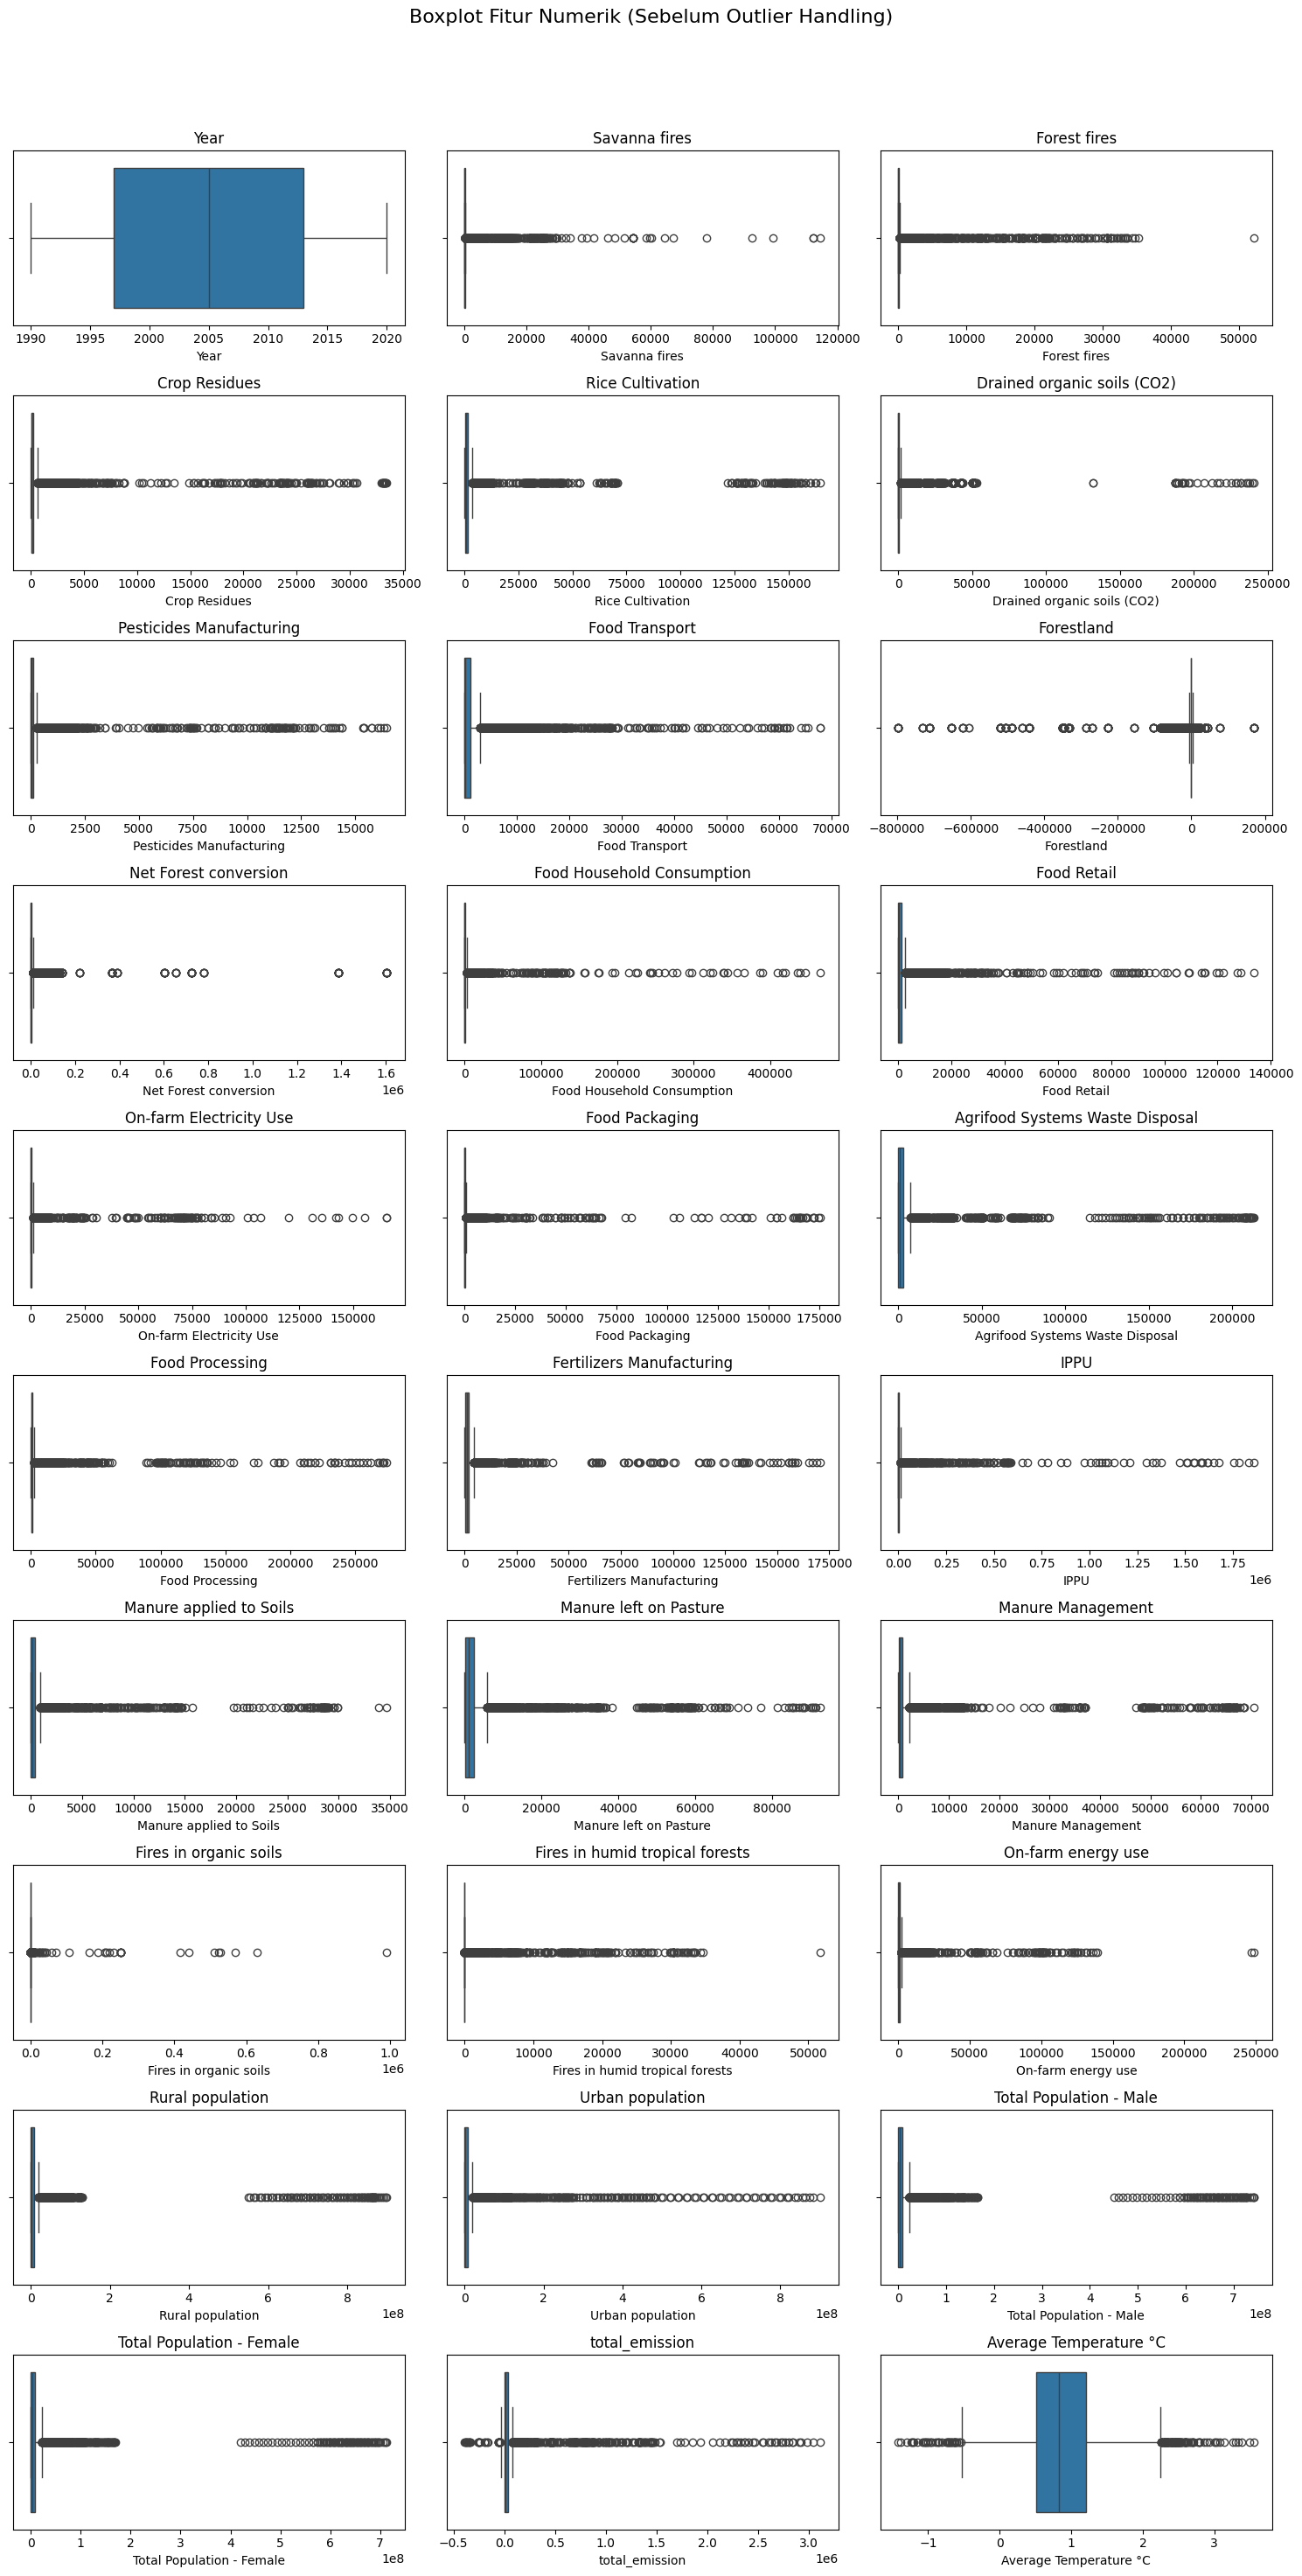

In [24]:
plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.suptitle("Boxplot Fitur Numerik (Sebelum Outlier Handling)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

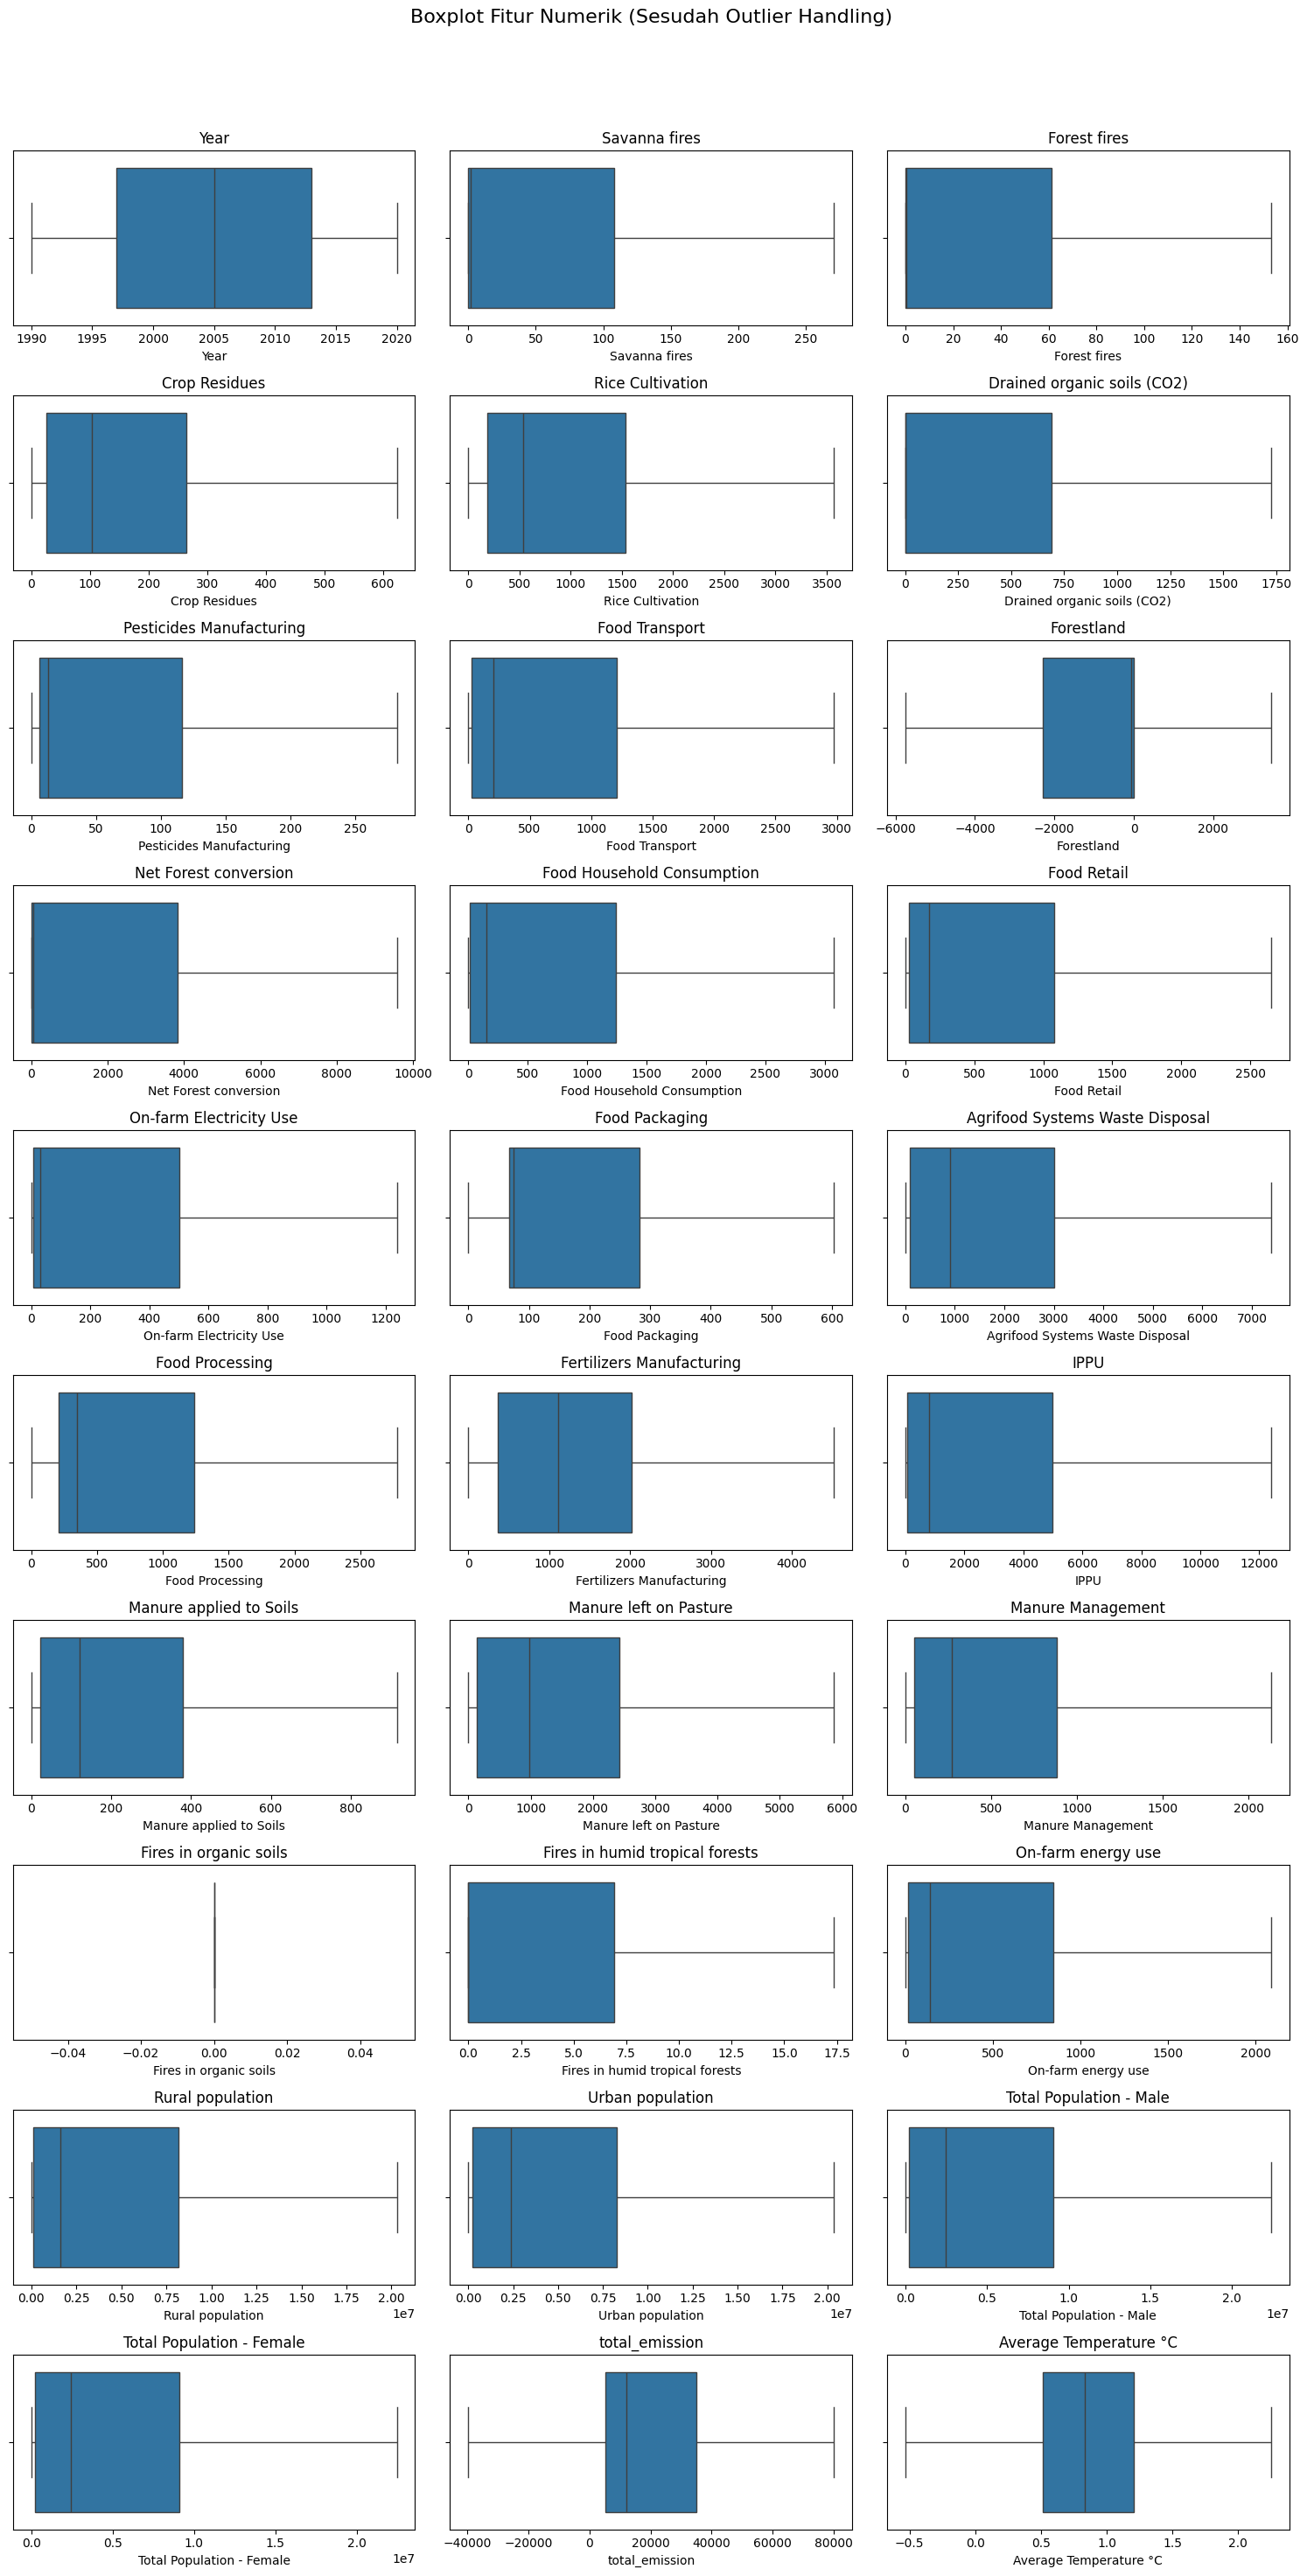

In [25]:
plt.figure(figsize=(n_cols * 5, n_rows * 3))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_outlier[col])
    plt.title(col)

plt.suptitle("Boxplot Fitur Numerik (Sesudah Outlier Handling)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
scaler = StandardScaler()

df_scaled = df_outlier.copy()
df_scaled[numerical_cols] = scaler.fit_transform(
    df_outlier[numerical_cols]
)


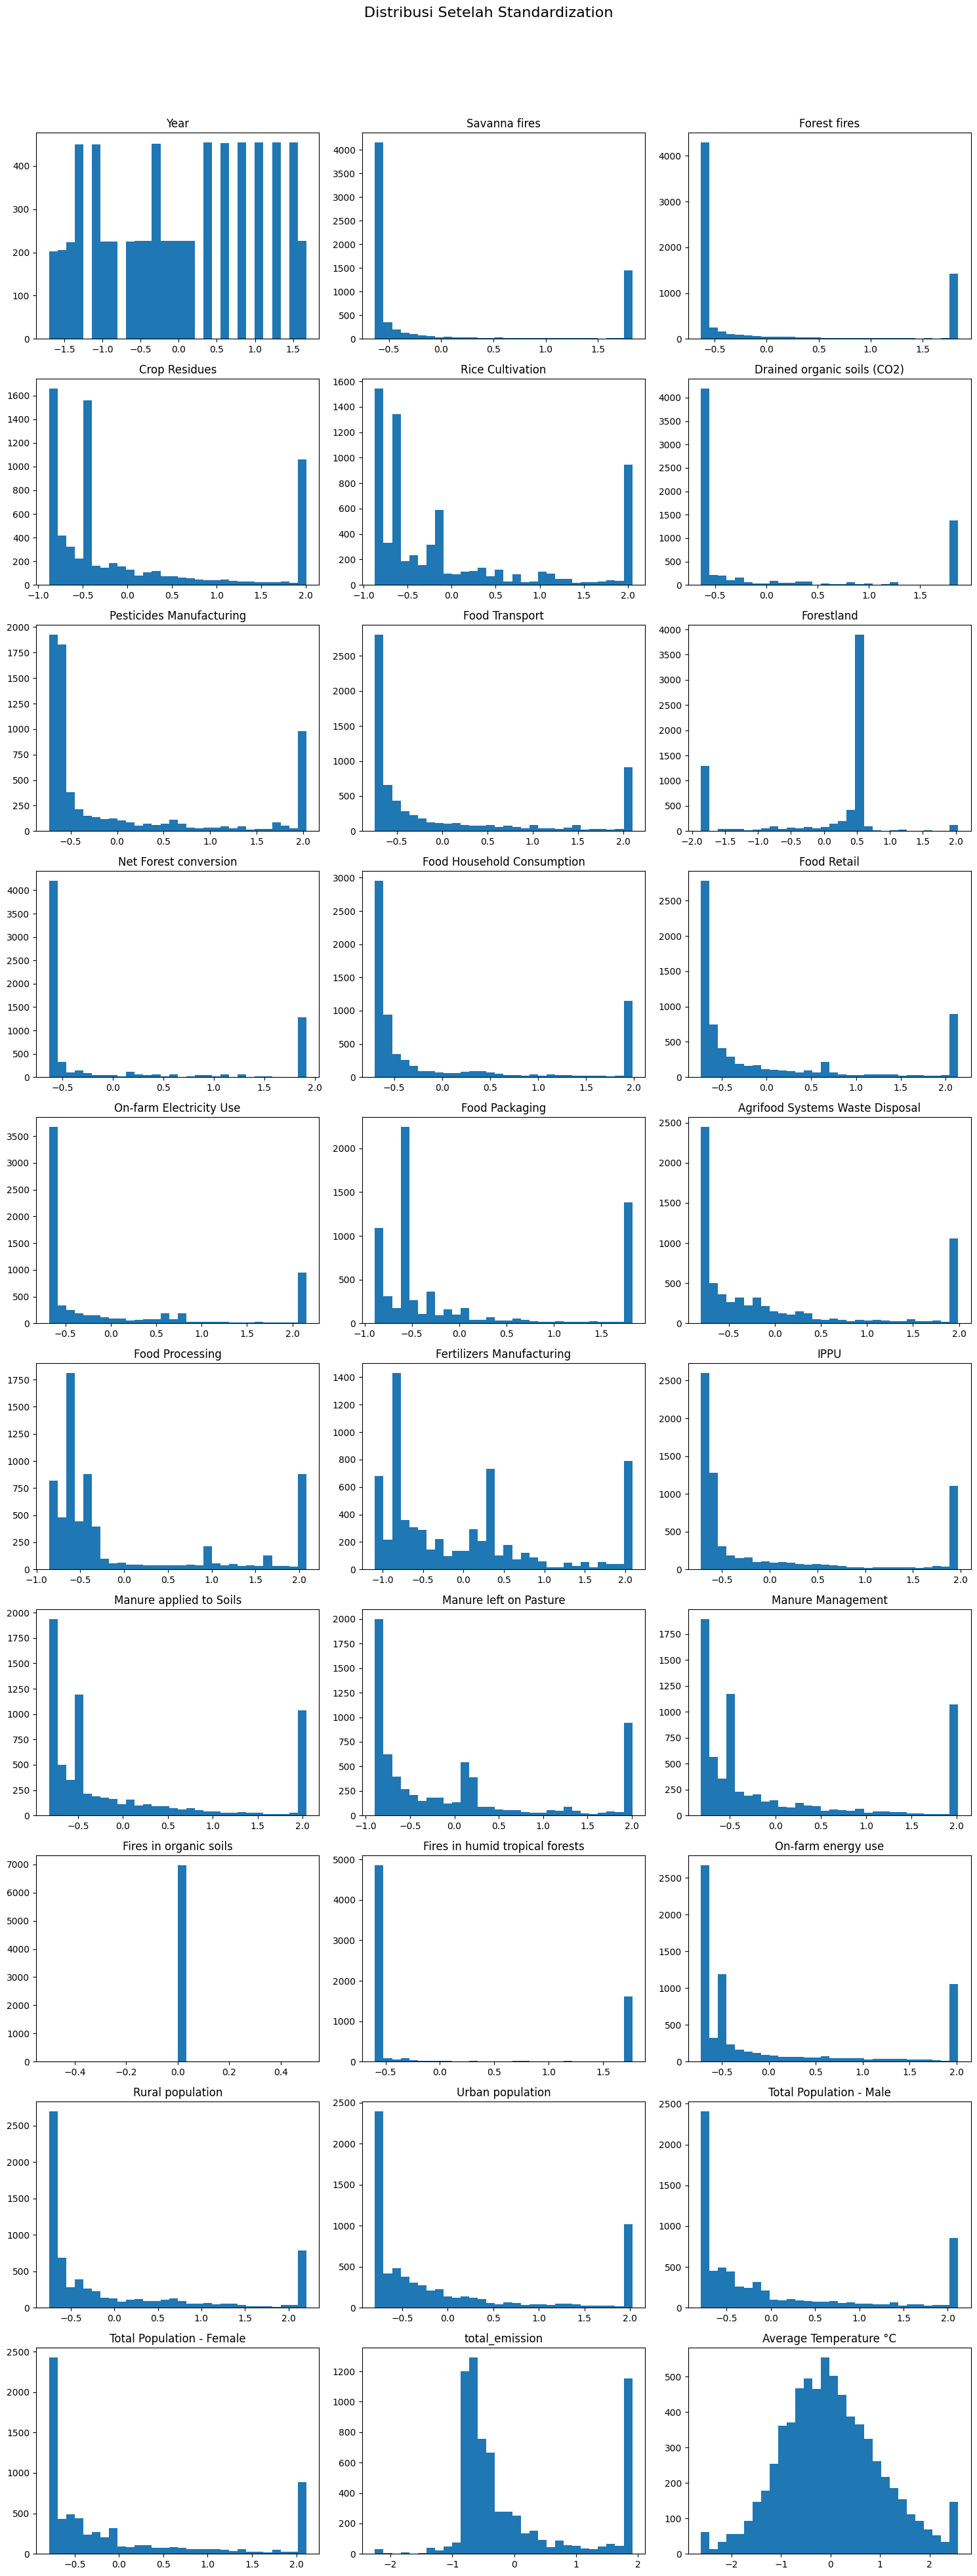

In [26]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_scaled[col], bins=30)
    plt.title(col)

plt.suptitle("Distribusi Setelah Standardization", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
minmax = MinMaxScaler()

df_normalized = df_outlier.copy()
df_normalized[numerical_cols] = minmax.fit_transform(
    df_outlier[numerical_cols]
)


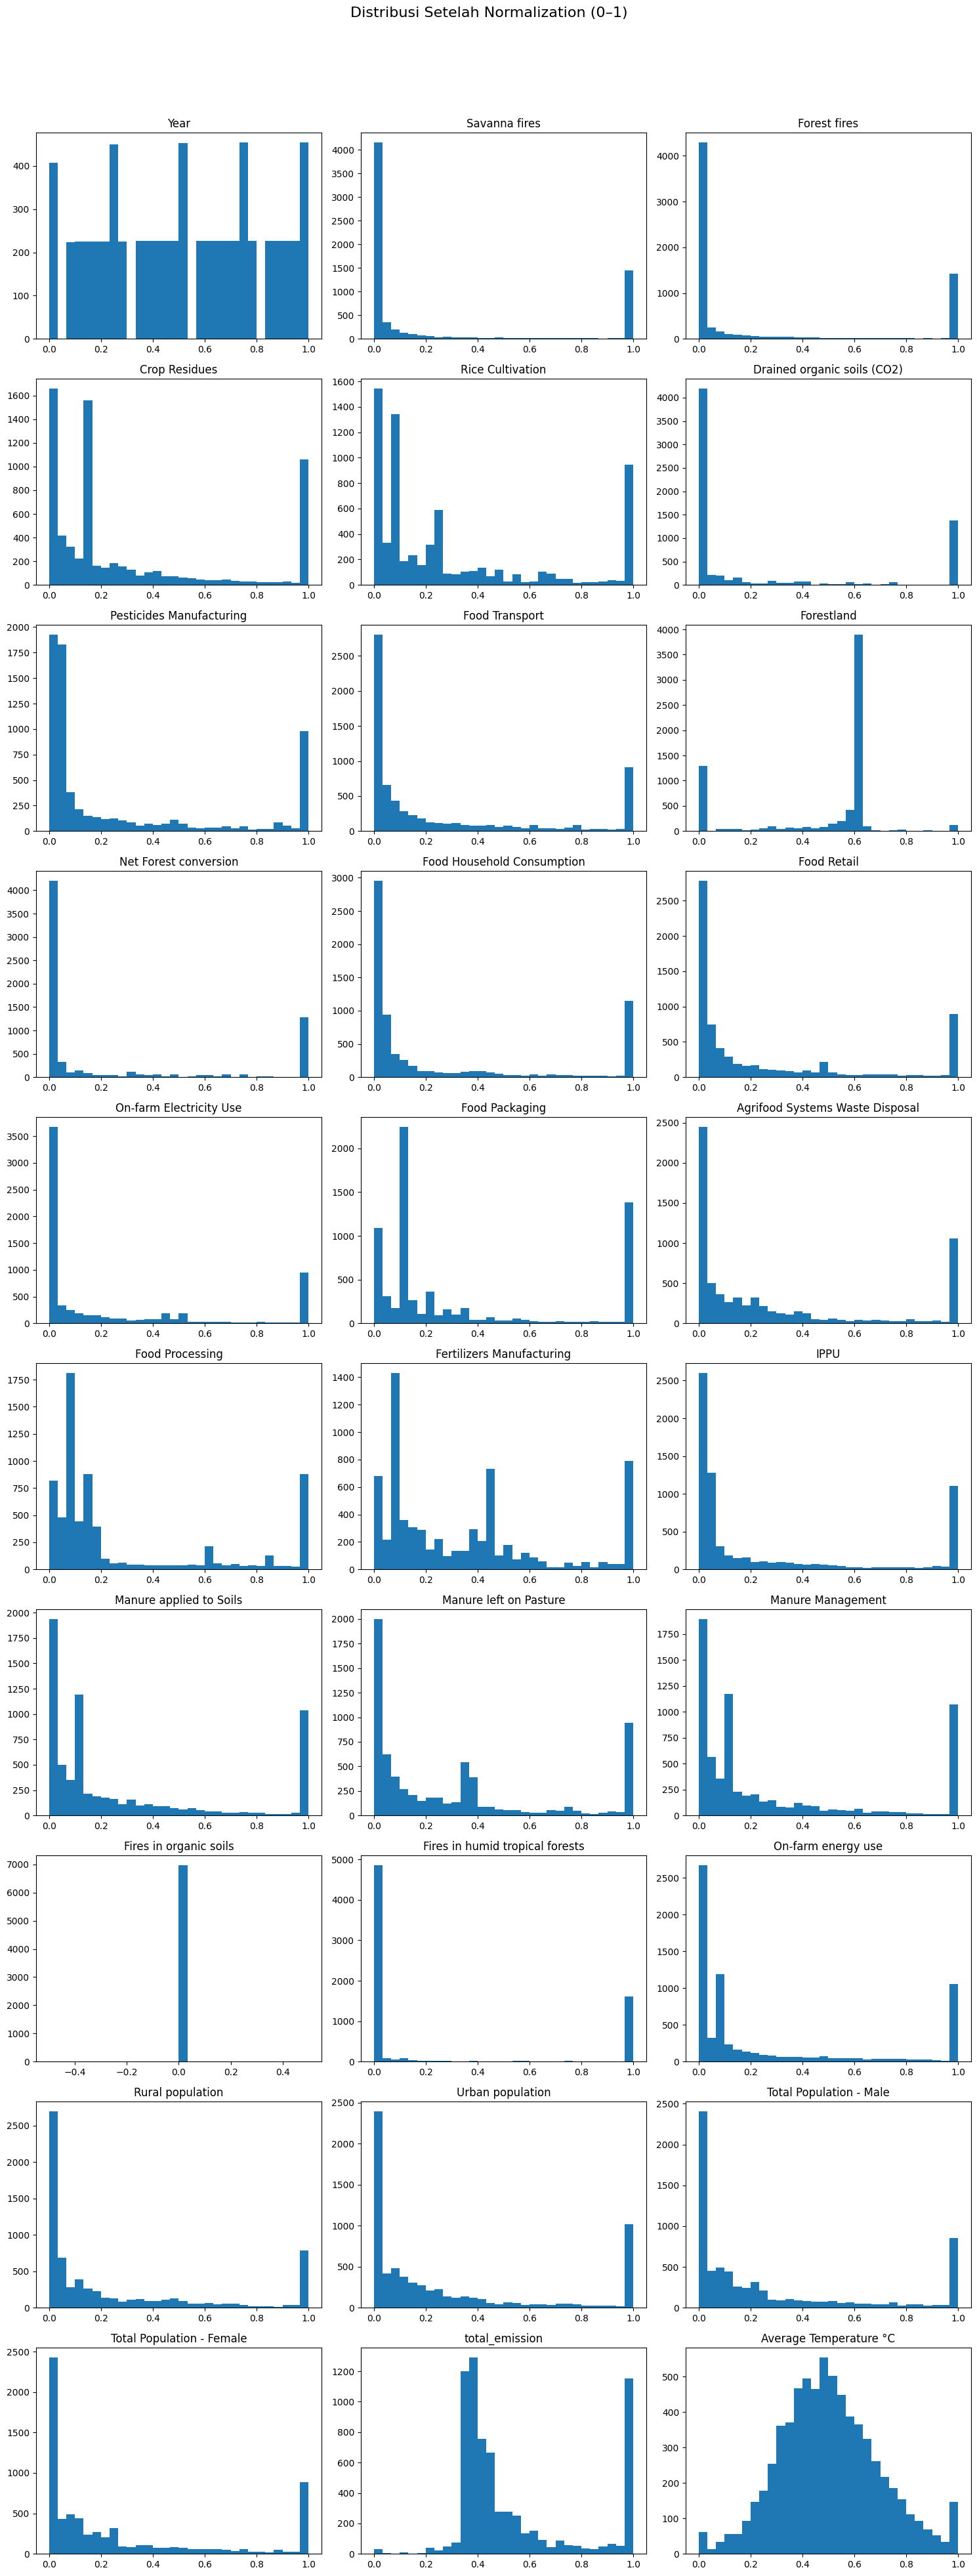

In [27]:
plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(df_normalized[col], bins=30)
    plt.title(col)

plt.suptitle("Distribusi Setelah Normalization (0–1)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
df_encoded = pd.get_dummies(
    df_normalized,
    columns=categorical_cols,
    drop_first=True
)

df_encoded.head()


,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Area_Uzbekistan,Area_Vanuatu,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Wallis and Futuna Islands,Area_Western Sahara,Area_Yemen,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
0,0.000000,0.05435,0.000364,0.329629,0.192173,0.0,0.041898,0.021211,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
1,0.033333,0.05435,0.000364,0.335864,0.189976,0.0,0.041560,0.020572,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
2,0.066667,0.05435,0.000364,0.315082,0.192173,0.0,0.041560,0.017918,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
3,0.100000,0.05435,0.000364,0.370045,0.192173,0.0,0.041560,0.018269,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False
4,0.133333,0.05435,0.000364,0.388052,0.197663,0.0,0.041560,0.018144,0.365278,0.0,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_encoded.info()

<class 'pandas.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Columns: 265 entries, Year to Area_Zimbabwe
dtypes: bool(235), float64(30)
memory usage: 3.2 MB


In [16]:
df_encoded.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,...,6965.000000,6965.0,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000,6965.000000
mean,0.504164,0.257598,0.255442,0.304964,0.298043,0.253766,0.265033,0.260874,0.477995,0.249025,...,0.289403,0.0,0.252494,0.263511,0.253955,0.282971,0.271535,0.272222,0.541316,0.504109
std,0.296489,0.406330,0.404301,0.346070,0.342659,0.398554,0.361541,0.352094,0.256109,0.391712,...,0.352749,0.0,0.422638,0.365058,0.338224,0.354200,0.343937,0.344438,0.240375,0.192467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.233333,0.000000,0.000000,0.040657,0.050777,0.000000,0.021291,0.009396,0.375000,0.000000,...,0.024560,0.0,0.000000,0.008481,0.004794,0.010674,0.008982,0.009240,0.375000,0.375000
50%,0.500000,0.006098,0.003383,0.166248,0.149821,0.000000,0.046130,0.068882,0.618159,0.004640,...,0.126583,0.0,0.000000,0.067571,0.078597,0.115756,0.110303,0.108764,0.432877,0.491105
75%,0.766667,0.400000,0.400000,0.424394,0.430466,0.400000,0.412774,0.405638,0.625000,0.400000,...,0.414736,0.0,0.400000,0.405089,0.402877,0.406404,0.405389,0.405544,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


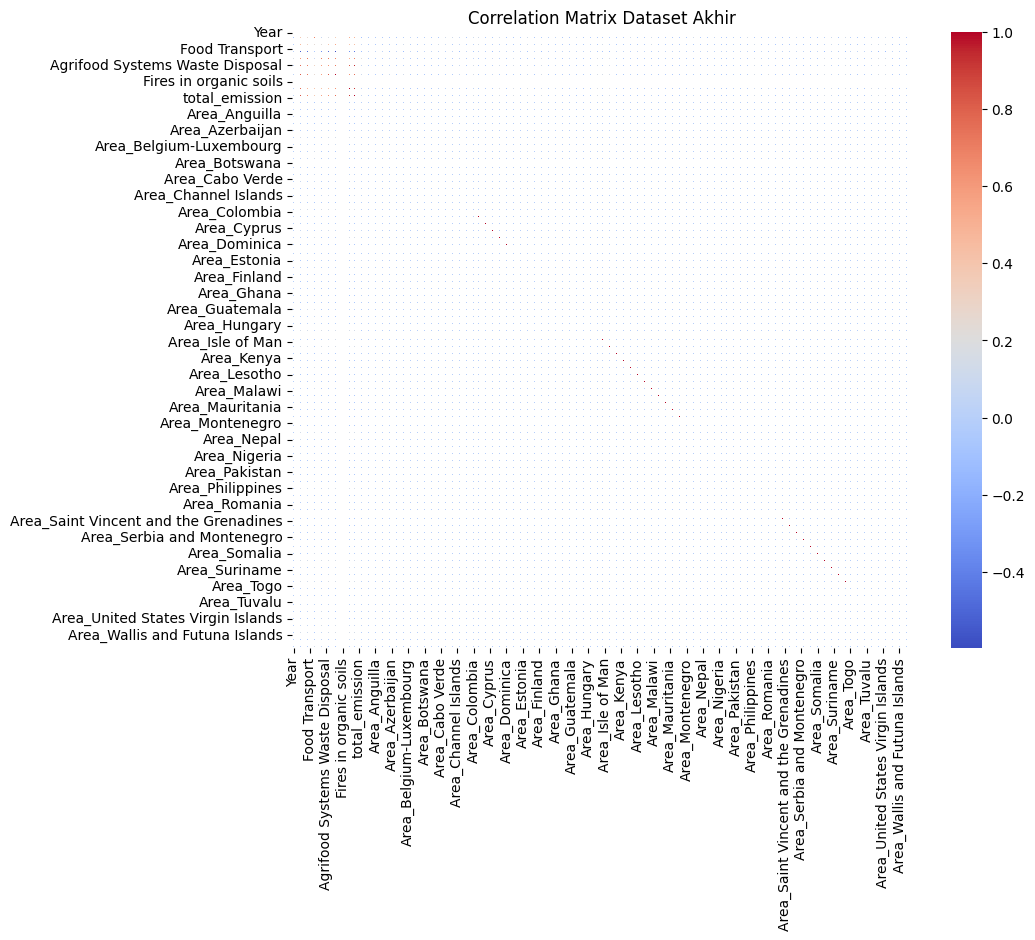

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df_encoded.corr(),
    cmap="coolwarm",
    linewidths=0.3
)
plt.title("Correlation Matrix Dataset Akhir")
plt.show()

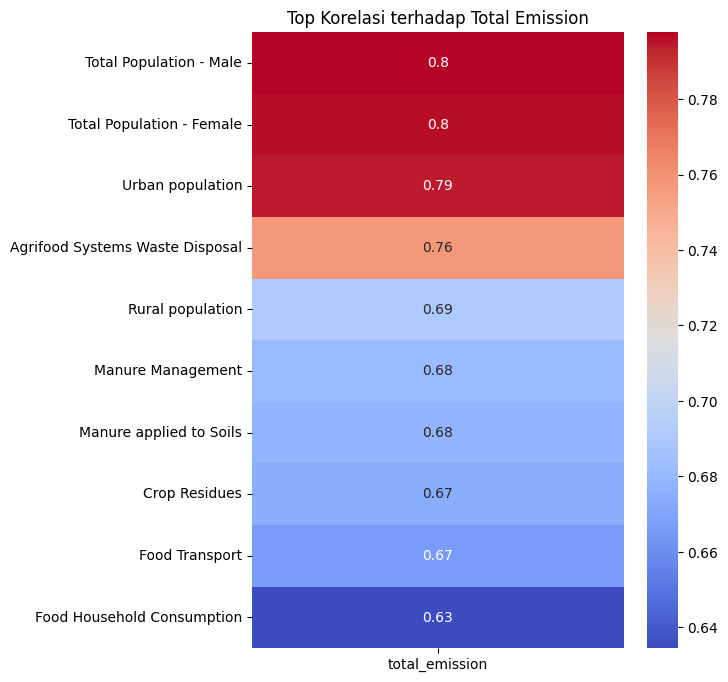

In [30]:
corr_matrix = df_encoded.corr()

corr_with_target = corr_matrix["total_emission"].sort_values(ascending=False)
corr_with_target

top_corr = corr_with_target.drop("total_emission").head(10)

plt.figure(figsize=(6,8))
sns.heatmap(
    top_corr.to_frame(),
    annot=True,
    cmap="coolwarm",
    cbar=True
)
plt.title("Top Korelasi terhadap Total Emission")
plt.show()